# Maximum Likelihood Estimation

Suppose each data is generated by a gaussian $x^t \tilde  N(x^t; {\mu, \sigma^2}) $




Max $ p(X/\theta) = \prod_{t=1}^N p(x/\theta)$

Log trick

$$ Max\;\; L(X/\theta) = \sum_{t=1}^N log (p(x/\theta)) $$



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sigma = 1
mu = 10

data = sigma * np.random.randn(100) + mu

In [3]:
data

array([11.43763132, 10.59302651, 11.51333668,  9.25164233,  8.86893262,
       10.90466888,  9.69207941, 10.46181128, 11.26077917,  9.28695479,
        9.42207055,  8.61918401, 11.70015099,  9.36878141, 10.02484842,
       10.53013928, 10.63535803,  9.28659186, 10.58394942,  7.94670767,
       11.67610857,  9.66576121,  9.8741017 , 10.29010839,  9.79718171,
        9.32392586, 11.58975876, 10.68603159, 11.82760646,  9.53273705,
       12.06894339,  9.21792133, 10.14024405,  9.05266051, 10.50620073,
        9.53638475, 10.28143316, 12.30966228, 10.22892215, 10.92805552,
       10.82062254, 10.69863733,  9.46618932, 10.34960488, 10.71126568,
        9.66538318, 11.06977991, 10.847913  , 10.63653687,  9.83427698,
        9.60026172, 10.01696038,  9.52961032, 10.27217317,  9.63584296,
       11.09068386, 11.0005952 ,  8.6414325 , 10.36398919,  8.27790963,
       11.12750494, 10.72414394, 10.35175202, 10.72360602,  9.88867281,
        9.69773816, 11.14775238,  9.61447254,  9.45216764,  9.95

In [4]:
data.mean()

10.204545346392997

In [5]:
data.var()

0.7917105632141066

# two class

In [6]:
sigma = 2
mu1 = 10
mu2 = 20

data1 = sigma * np.random.randn(100) + mu1
data2 = sigma * np.random.randn(100) + mu2

In [7]:
x = np.concatenate((data1,data2))
y = [0]*100 + [1]*100

In [8]:
data = pd.DataFrame.from_dict({"x": x, "r":y})

In [9]:
data

,x,r
0,8.346513,0
1,13.915720,0
2,11.018224,0
3,11.782286,0
4,8.581782,0
...,...,...
195,20.076623,1
196,20.726470,1
197,18.258558,1
198,19.920910,1


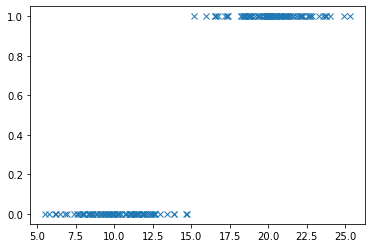

In [10]:
plt.plot(x, y, 'x')

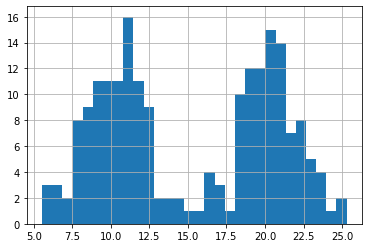

In [11]:
data['x'].hist(bins = 30)

In [12]:
data[data['r'] == 0]

,x,r
0,8.346513,0
1,13.915720,0
2,11.018224,0
3,11.782286,0
4,8.581782,0
...,...,...
95,5.545674,0
96,8.064391,0
97,14.740697,0
98,6.790773,0


In [13]:
data[data['r'] == 0]['x'].mean()

10.17815234451445

In [14]:
data[data['r'] == 1]['x'].mean()

20.27103742339919

In [15]:
data[data['r'] == 1]['x'].std()

1.9629740156583797

# Bayes 

$$
p(c_i / x) = \frac{p(x/c_i) p(c_i)}{p(x)} \approx p(x/c_i) p(c_i)
$$


Our model

$$
g_i(x) = log p(x/c_i) + log p(c_i)
$$

Gaussian
$$
p(x; \theta, \sigma^2) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

In [16]:
mu0 = data[data['r'] == 0]['x'].mean()
mu1 = data[data['r'] == 1]['x'].mean()

mu0, mu1

(10.17815234451445, 20.27103742339919)

In [17]:
sig0 = data[data['r'] == 0]['x'].std()
sig1 = data[data['r'] == 1]['x'].std()
sig0, sig1

(1.947646733983499, 1.9629740156583797)

In [18]:
prior0 = np.sum(data['r'] == 1)/len(data)
prior1 = np.sum(data['r'] == 1)/len(data)
prior0,prior1

(0.5, 0.5)

In [19]:
from scipy import stats

def model(x, mu, std, prior):
    snd = stats.norm(mu, std)
    return np.log(snd.pdf(x)) + np.log(prior)

In [20]:
g0 = model(15, mu0, sig0, prior0)
g0

-5.3433273337531375

In [21]:
g1 = model(15, mu1, sig1, prior1)
g1

-5.891777435953683

In [22]:
g0 = model(5, mu0, sig0, prior0)
g0

-5.812973918200239

In [23]:
g1 = model(5, mu1, sig1, prior1)
g1

-32.547177802232376

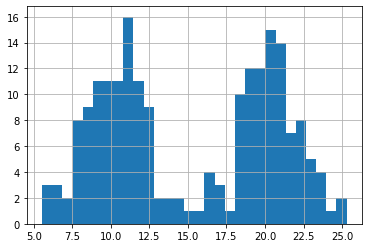

In [24]:
data['x'].hist(bins = 30)

In [25]:
x = 25
g0 = model(x, mu0, sig0, prior0)
g1 = model(x, mu1, sig1, prior1)
g0, g1, 'Class0' if g0 > g1 else 'Class1'

(-31.235757865221256, -5.188381008004636, 'Class1')

# Cok Boyutlu Veri
A multivariate normal random variable.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

In [26]:
import numpy as np
import pandas as pd

import requests
import io


url = "https://raw.githubusercontent.com/uzay00/KaVe-Egitim/master/ARGE/Sorular/1-İseAlımRobotu/data.csv"
s = requests.get(url).content

data = pd.read_csv(io.StringIO(s.decode('utf-8')))
data

,age,algorithm,gpa,social,y
0,3.576113,3.728920,0.930603,4.438372,1
1,1.829891,4.393183,3.137649,4.831307,1
2,3.981593,4.050717,3.886304,4.865860,1
3,1.734623,4.605488,2.605315,3.663224,1
4,2.759050,4.288383,1.894925,3.238931,1
...,...,...,...,...,...
995,0.756427,0.931875,2.769794,0.218749,0
996,3.344518,1.182757,2.696908,0.735196,0
997,1.812786,1.081876,2.940970,1.076683,0
998,2.316372,2.211849,4.594402,0.614308,0


In [58]:
idx_train = np.random.choice(1000, size = 800,replace = False)
idx_test = np.array(list(set(range(1000)) - set(idx_train)))

X_train = data.values[idx_train, :-1]
y_train = data.values[idx_train, -1]

X_test = data.values[idx_test, :-1]
y_test = data.values[idx_test, -1]

In [59]:
X_train

array([[2.41144088, 0.17675848, 3.25235372, 0.20943341],
       [1.79533151, 0.35824019, 2.88735445, 0.84388388],
       [3.06577223, 3.46966911, 2.88113661, 4.14941375],
       ...,
       [2.9062483 , 1.30228038, 1.59386372, 2.5752251 ],
       [2.16777478, 2.10926798, 0.84421525, 1.55065013],
       [1.75050995, 0.54733303, 2.85301416, 0.42161353]])

In [68]:
mu0 = X_train[y_train == 0].mean(axis=0)
mu1 = X_train[y_train == 1].mean(axis=0)
mu0.shape, mu1.shape

((4,), (4,))

In [69]:
sig0 = np.cov(X_train[y_train == 0].T)
sig1 = np.cov(X_train[y_train == 1].T)
sig0.shape, sig1.shape

((4, 4), (4, 4))

In [70]:
prior0 = len(X_train[y_train == 0])/len(data)
prior1 = len(X_train[y_train == 1])/len(data)
prior0,prior1

(0.72, 0.08)

In [71]:
from scipy.stats import multivariate_normal

def model(x, mu, std, prior):
    snd = multivariate_normal.pdf(x, mu, std)
    return np.log(snd) + np.log(prior)

In [72]:
x = np.array([1,1,1,1])
g0 = model(x, mu0, sig0, prior0)
g1 = model(x, mu1, sig1, prior1)
g0, g1, 'Class0' if g0 > g1 else 'Class1'

(-5.42873465589082, -30.72027335834265, 'Class0')

In [73]:
x = np.array([1,5,1,5])
g0 = model(x, mu0, sig0, prior0)
g1 = model(x, mu1, sig1, prior1)
g0, g1, 'Class0' if g0 > g1 else 'Class1'

(-55.308924780964595, -9.69733829941486, 'Class1')